### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda= pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

#1. Análisis de facturación



In [ ]:
# Función para calcular la facturación total de una tienda
def calcular_facturacion(df, nombre_tienda):
    try:
        print(f"\n--- {nombre_tienda} ---")

        # La columna de precio es la tercera columna (índice 2)
        precio_col = df.columns[2]  # Tercera columna

        # Convertir a numérico y calcular suma
        precios = pd.to_numeric(df[precio_col], errors='coerce').dropna()

        if len(precios) > 0:
            total_facturacion = precios.sum()
            print(f"Total de registros: {len(precios)}")
            print(f"Facturación total: ${total_facturacion:,.2f}")
            return total_facturacion
        else:
            print("No hay datos numéricos válidos en la columna de precios")
            return None

    except Exception as e:
        print(f"Error en {nombre_tienda}: {e}")
        return None

# Comparación de tiendas
print(f"\n" + "="*50)
print("ANALISIS DE FACTURACIÓN")
print("="*50)
# Para tienda 1
facturacion_t1 = calcular_facturacion(tienda1, "TIENDA 1")

# Para tienda 2
facturacion_t2 = calcular_facturacion(tienda2, "TIENDA 2")

# Para tienda 3
facturacion_t3 = calcular_facturacion(tienda3, "TIENDA 3")

# Para tienda 4
facturacion_t4 = calcular_facturacion(tienda4, "TIENDA 4")

# Mostrar resultados finales
print(f"\n" + "="*50)
print("RESULTADOS FINALES DE FACTURACIÓN")
print("="*50)
print(f"TIENDA 1: ${facturacion_t1:,.2f}" if facturacion_t1 is not None else "TIENDA 1: No disponible")
print(f"TIENDA 2: ${facturacion_t2:,.2f}" if facturacion_t2 is not None else "TIENDA 2: No disponible")
print(f"TIENDA 3: ${facturacion_t3:,.2f}" if facturacion_t3 is not None else "TIENDA 3: No disponible")
print(f"TIENDA 4: ${facturacion_t4:,.2f}" if facturacion_t4 is not None else "TIENDA 4: No disponible")

# Comparación de tiendas
print(f"\n" + "="*50)
print("COMPARACIÓN DE FACTURACIÓN")
print("="*50)

facturaciones = []
if facturacion_t1 is not None:
    facturaciones.append(("TIENDA 1", facturacion_t1))
if facturacion_t2 is not None:
    facturaciones.append(("TIENDA 2", facturacion_t2))
if facturacion_t3 is not None:
    facturaciones.append(("TIENDA 3", facturacion_t3))
if facturacion_t4 is not None:
    facturaciones.append(("TIENDA 4", facturacion_t4))

if facturaciones:
    # Ordenar por facturación (de mayor a menor)
    facturaciones_ordenadas = sorted(facturaciones, key=lambda x: x[1], reverse=True)

    print("Ranking por facturación (mayor a menor):")
    for i, (tienda, facturacion) in enumerate(facturaciones_ordenadas, 1):
        print(f"{i}. {tienda}: ${facturacion:,.2f}")

    # Identificar tienda con mayor y menor facturación
    mayor_facturacion = max(facturaciones, key=lambda x: x[1])
    menor_facturacion = min(facturaciones, key=lambda x: x[1])

    print(f"\nMayor facturación: {mayor_facturacion[0]} (${mayor_facturacion[1]:,.2f})")
    print(f"Menor facturación: {menor_facturacion[0]} (${menor_facturacion[1]:,.2f})")

    # Calcular diferencia
    diferencia = mayor_facturacion[1] - menor_facturacion[1]
    print(f"Diferencia entre mayor y menor: ${diferencia:,.2f}")


ANALISIS DE FACTURACIÓN

--- TIENDA 1 ---
Total de registros: 2359
Facturación total: $1,150,880,400.00

--- TIENDA 2 ---
Total de registros: 2359
Facturación total: $1,116,343,500.00

--- TIENDA 3 ---
Total de registros: 2359
Facturación total: $1,098,019,600.00

--- TIENDA 4 ---
Total de registros: 2358
Facturación total: $1,038,375,700.00

RESULTADOS FINALES DE FACTURACIÓN
TIENDA 1: $1,150,880,400.00
TIENDA 2: $1,116,343,500.00
TIENDA 3: $1,098,019,600.00
TIENDA 4: $1,038,375,700.00

COMPARACIÓN DE FACTURACIÓN
Ranking por facturación (mayor a menor):
1. TIENDA 1: $1,150,880,400.00
2. TIENDA 2: $1,116,343,500.00
3. TIENDA 3: $1,098,019,600.00
4. TIENDA 4: $1,038,375,700.00

Mayor facturación: TIENDA 1 ($1,150,880,400.00)
Menor facturación: TIENDA 4 ($1,038,375,700.00)
Diferencia entre mayor y menor: $112,504,700.00


# 2. Ventas por categoría

In [ ]:

# Análisis de ventas por categoría por tienda

import pandas as pd
import numpy as np

print("=== ANÁLISIS DE VENTAS POR CATEGORÍA ===")

# Función para calcular ventas por categoría
def ventas_por_categoria(df, nombre_tienda):
    try:
        print(f"\n--- {nombre_tienda} ---")

        # La columna de categoría es la segunda columna (índice 1)
        # La columna de precio es la tercera columna (índice 2)
        categoria_col = df.columns[1]  # Segunda columna
        precio_col = df.columns[2]     # Tercera columna

        print(f"Usando columna '{categoria_col}' para categorías")
        print(f"Usando columna '{precio_col}' para precios")

        # Convertir precios a numérico y agrupar por categoría
        precios = pd.to_numeric(df[precio_col], errors='coerce').dropna()
        categorias = df[categoria_col].dropna()

        # Verificar que ambos tienen la misma longitud
        if len(precios) == len(categorias):
            # Crear DataFrame temporal para agrupar
            temp_df = pd.DataFrame({
                'categoria': categorias,
                'precio': precios
            })

            # Agrupar por categoría y sumar precios
            ventas_categoria = temp_df.groupby('categoria')['precio'].sum().sort_values(ascending=False)

            if len(ventas_categoria) > 0:
                print(f"Total de registros procesados: {len(ventas_categoria)} categorías")
                print("Ventas por categoría:")
                for categoria, venta in ventas_categoria.items():
                    print(f"  {categoria}: ${venta:,.2f}")
                return ventas_categoria
            else:
                print("No hay datos válidos para procesar")
                return None
        else:
            print("Error: Discrepancia en el número de registros entre categorías y precios")
            return None

    except Exception as e:
        print(f"Error en {nombre_tienda}: {e}")
        return None



# Función para mostrar resumen de una tienda
def mostrar_resumen_categoria(nombre_tienda, ventas):
    if ventas is not None and len(ventas) > 0:
        print(f"\n{nombre_tienda}:")
        print("Categorías ordenadas por ventas (mayor a menor):")
        for i, (categoria, venta) in enumerate(ventas.items(), 1):
            print(f"  {i}. {categoria}: ${venta:,.2f}")
    else:
        print(f"\n{nombre_tienda}: No disponible o sin datos")

# Mostrar resúmenes
mostrar_resumen_categoria("TIENDA 1", ventas_cat_t1)
mostrar_resumen_categoria("TIENDA 2", ventas_cat_t2)
mostrar_resumen_categoria("TIENDA 3", ventas_cat_t3)
mostrar_resumen_categoria("TIENDA 4", ventas_cat_t4)

# Análisis comparativo de categorías
print(f"\n" + "="*60)
print("ANÁLISIS COMPARATIVO DE CATEGORÍAS")
print("="*60)

# Combinar todas las categorías
categorias_totales = {}

# Procesar cada tienda
tiendas_data = [
    ("TIENDA 1", ventas_cat_t1),
    ("TIENDA 2", ventas_cat_t2),
    ("TIENDA 3", ventas_cat_t3),
    ("TIENDA 4", ventas_cat_t4)
]

for nombre_tienda, ventas in tiendas_data:
    if ventas is not None:
        for categoria, venta in ventas.items():
            if categoria in categorias_totales:
                categorias_totales[categoria] += venta
            else:
                categorias_totales[categoria] = venta

# Ordenar por ventas totales
categorias_ordenadas = sorted(categorias_totales.items(), key=lambda x: x[1], reverse=True)

print("Categorías ordenadas por ventas totales (mayor a menor):")
for i, (categoria, venta) in enumerate(categorias_ordenadas, 1):
    print(f"  {i}. {categoria}: ${venta:,.2f}")

# Identificar categoría más popular
if categorias_ordenadas:
    categoria_mas_popular = categorias_ordenadas[0][0]
    venta_mas_popular = categorias_ordenadas[0][1]
    print(f"\nCategoría más popular general: {categoria_mas_popular} (${venta_mas_popular:,.2f})")

# Mostrar categorías más populares por tienda
print(f"\nCategorías más populares por tienda:")
for nombre_tienda, ventas in tiendas_data:
    if ventas is not None and len(ventas) > 0:
        categoria_top = ventas.index[0]
        venta_top = ventas.iloc[0]
        print(f"  {nombre_tienda}: {categoria_top} (${venta_top:,.2f})")

=== ANÁLISIS DE VENTAS POR CATEGORÍA ===

TIENDA 1:
Categorías ordenadas por ventas (mayor a menor):
  1. Electrónicos: $429,493,500.00
  2. Electrodomésticos: $363,685,200.00
  3. Muebles: $187,633,700.00
  4. Instrumentos musicales: $91,299,000.00
  5. Deportes y diversión: $39,290,000.00
  6. Juguetes: $17,995,700.00
  7. Artículos para el hogar: $12,698,400.00
  8. Libros: $8,784,900.00

TIENDA 2:
Categorías ordenadas por ventas (mayor a menor):
  1. Electrónicos: $410,831,100.00
  2. Electrodomésticos: $348,567,800.00
  3. Muebles: $176,426,300.00
  4. Instrumentos musicales: $104,990,300.00
  5. Deportes y diversión: $34,744,500.00
  6. Juguetes: $15,945,400.00
  7. Artículos para el hogar: $14,746,900.00
  8. Libros: $10,091,200.00

TIENDA 3:
Categorías ordenadas por ventas (mayor a menor):
  1. Electrónicos: $410,775,800.00
  2. Electrodomésticos: $329,237,900.00
  3. Muebles: $201,072,100.00
  4. Instrumentos musicales: $77,380,900.00
  5. Deportes y diversión: $35,593,100.00


# 3. Calificación promedio de la tienda


=== ANÁLISIS DE CALIFICACIÓN PROMEDIO POR TIENDA ===

--- TIENDA 1 ---
Total de calificaciones: 2359
Calificación promedio: 3.98/5.0

--- TIENDA 2 ---
Total de calificaciones: 2359
Calificación promedio: 4.04/5.0

--- TIENDA 3 ---
Total de calificaciones: 2359
Calificación promedio: 4.05/5.0

--- TIENDA 4 ---
Total de calificaciones: 2358
Calificación promedio: 4.00/5.0

COMPARACIÓN DE CALIFICACIONES
Ranking por calificación promedio (mayor a menor):
1. TIENDA 3: 4.05/5.0
2. TIENDA 2: 4.04/5.0
3. TIENDA 4: 4.00/5.0
4. TIENDA 1: 3.98/5.0


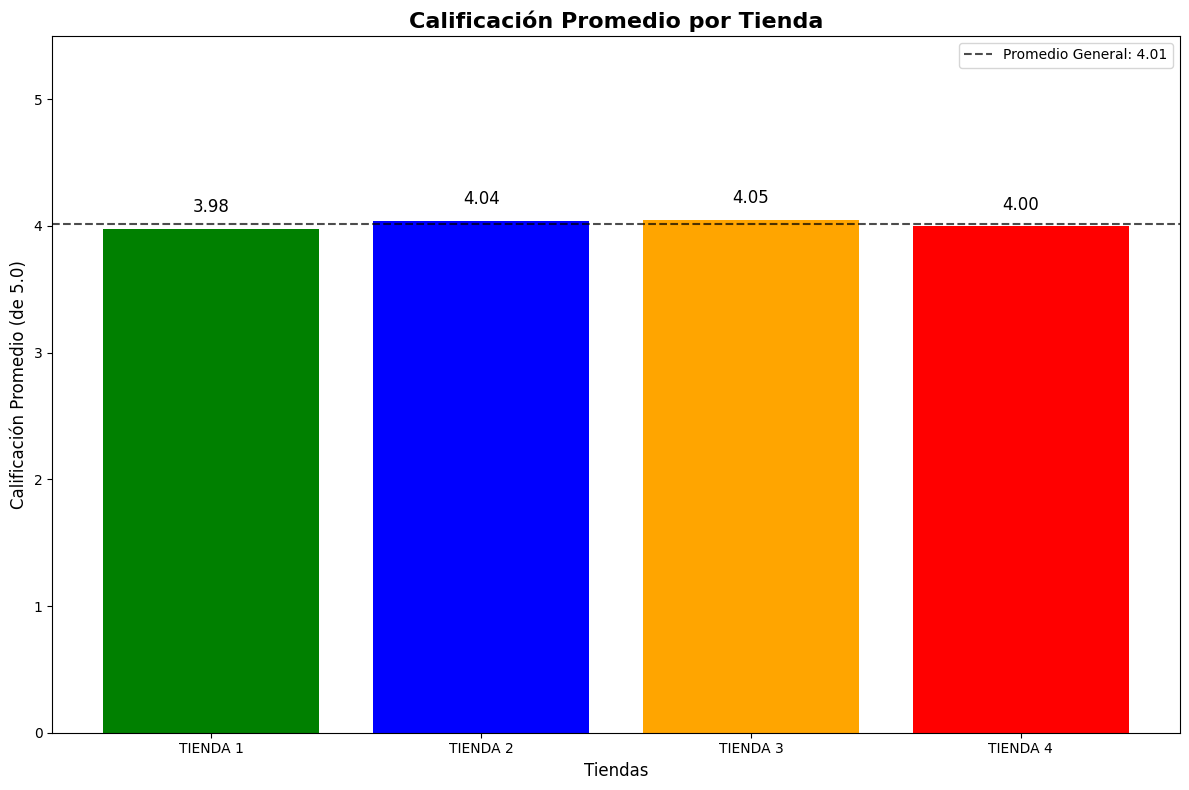

Promedio general de calificaciones: 4.01/5.0
Desviación estándar: 0.03

Distribución porcentual:
  TIENDA 3: 81.0% (4.05/5.0)
  TIENDA 2: 80.7% (4.04/5.0)
  TIENDA 4: 79.9% (4.00/5.0)
  TIENDA 1: 79.5% (3.98/5.0)


In [34]:

# Análisis de calificación promedio por tienda con gráfico

import matplotlib.pyplot as plt
import seaborn as sns

print("=== ANÁLISIS DE CALIFICACIÓN PROMEDIO POR TIENDA ===")

# Función para calcular calificación promedio
def calcular_calificacion_promedio(df, nombre_tienda):
    try:
        print(f"\n--- {nombre_tienda} ---")

        # La columna de calificación es la octava columna (índice 7)
        calificacion_col = df.columns[7]  # Octava columna

        # Convertir a numérico y calcular promedio
        calificaciones = pd.to_numeric(df[calificacion_col], errors='coerce').dropna()

        if len(calificaciones) > 0:
            promedio = calificaciones.mean()
            print(f"Total de calificaciones: {len(calificaciones)}")
            print(f"Calificación promedio: {promedio:.2f}/5.0")
            return promedio
        else:
            print("No hay datos numéricos válidos en la columna de calificaciones")
            return None

    except Exception as e:
        print(f"Error en {nombre_tienda}: {e}")
        return None


# Para tienda 1
calif_prom_t1 = calcular_calificacion_promedio(tienda1, "TIENDA 1")

# Para tienda 2
calif_prom_t2 = calcular_calificacion_promedio(tienda2, "TIENDA 2")

# Para tienda 3
calif_prom_t3 = calcular_calificacion_promedio(tienda3, "TIENDA 3")

# Para tienda 4
calif_prom_t4 = calcular_calificacion_promedio(tienda4, "TIENDA 4")


# Comparación de tiendas
print(f"\n" + "="*50)
print("COMPARACIÓN DE CALIFICACIONES")
print("="*50)

calificaciones = []
if calif_prom_t1 is not None:
    calificaciones.append(("TIENDA 1", calif_prom_t1))
if calif_prom_t2 is not None:
    calificaciones.append(("TIENDA 2", calif_prom_t2))
if calif_prom_t3 is not None:
    calificaciones.append(("TIENDA 3", calif_prom_t3))
if calif_prom_t4 is not None:
    calificaciones.append(("TIENDA 4", calif_prom_t4))

if calificaciones:
    # Ordenar por calificación (de mayor a menor)
    calificaciones_ordenadas = sorted(calificaciones, key=lambda x: x[1], reverse=True)

    print("Ranking por calificación promedio (mayor a menor):")
    for i, (tienda, calif) in enumerate(calificaciones_ordenadas, 1):
        print(f"{i}. {tienda}: {calif:.2f}/5.0")

    # Identificar tienda con mejor y peor calificación
    mejor_calif = max(calificaciones, key=lambda x: x[1])
    peor_calif = min(calificaciones, key=lambda x: x[1])



# Preparar datos para el gráfico
tiendas = [item[0] for item in calificaciones]
califs = [item[1] for item in calificaciones]

# Crear gráfico
plt.figure(figsize=(12, 8))

# Gráfico de barras
bars = plt.bar(tiendas, califs, color=['green', 'blue', 'orange', 'red'])

# Personalizar el gráfico
plt.title('Calificación Promedio por Tienda', fontsize=16, fontweight='bold')
plt.ylabel('Calificación Promedio (de 5.0)', fontsize=12)
plt.xlabel('Tiendas', fontsize=12)
plt.ylim(0, 5.5)  # Escala de 0 a 5

# Añadir valores en las barras
for bar, calif in zip(bars, califs):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'{calif:.2f}', ha='center', va='bottom', fontsize=12)

# Añadir línea de promedio
promedio_general = sum(califs) / len(califs)
plt.axhline(y=promedio_general, color='black', linestyle='--', alpha=0.7,
           label=f'Promedio General: {promedio_general:.2f}')
plt.legend()

plt.tight_layout()
plt.show()


if calificaciones:
    # Promedio general
    promedio_general = sum([c[1] for c in calificaciones]) / len(calificaciones)
    print(f"Promedio general de calificaciones: {promedio_general:.2f}/5.0")

    # Desviación estándar
    desviacion = np.std([c[1] for c in calificaciones])
    print(f"Desviación estándar: {desviacion:.2f}")

    # Distribución porcentual
    print(f"\nDistribución porcentual:")
    for tienda, calif in calificaciones_ordenadas:
        porcentaje = (calif / 5.0) * 100
        print(f"  {tienda}: {porcentaje:.1f}% ({calif:.2f}/5.0)")

# 4. Productos más y menos vendidos

In [40]:

# Análisis de productos más y menos vendidos por tienda utilizando cantidad de filas

from collections import Counter

print("=== ANÁLISIS DE PRODUCTOS MÁS Y MENOS VENDIDOS ===")

# Función para identificar productos más y menos vendidos usando conteo de filas
def productos_mas_menos_vendidos_filas(df, nombre_tienda):
    try:
        print(f"\n--- {nombre_tienda} ---")

        # La columna de producto es la primera columna (índice 0)
        producto_col = df.columns[0]  # Primera columna

        print(f"Usando columna '{producto_col}' para productos")

        # Contar cuántas veces aparece cada producto (cantidad de filas por producto)
        conteo_productos = df[producto_col].value_counts()

        if len(conteo_productos) > 0:
            print(f"Total de productos diferentes: {len(conteo_productos)}")

            # Productos más vendidos (top 5)
            top_vendidos = conteo_productos.head(5)
            print("Productos más vendidos (por cantidad de ventas):")
            for i, (producto, cantidad) in enumerate(top_vendidos.items(), 1):
                print(f"  {i}. {producto}: {int(cantidad)} ventas")

            # Productos menos vendidos (últimos 5)
            bottom_vendidos = conteo_productos.tail(5)
            print("Productos menos vendidos (por cantidad de ventas):")
            for i, (producto, cantidad) in enumerate(bottom_vendidos.items(), 1):
                print(f"  {i}. {producto}: {int(cantidad)} ventas")

            return {
                'mas_vendidos': top_vendidos,
                'menos_vendidos': bottom_vendidos
            }
        else:
            print("No hay datos válidos para procesar")
            return None

    except Exception as e:
        print(f"Error en {nombre_tienda}: {e}")
        import traceback
        traceback.print_exc()
        return None



# Función para mostrar resumen de una tienda
def mostrar_resumen_producto(nombre_tienda, resultados):
    if resultados is not None:
        print(f"\n{nombre_tienda}:")
        if 'mas_vendidos' in resultados and len(resultados['mas_vendidos']) > 0:
            print("Productos más vendidos (por cantidad de ventas):")
            for i, (producto, cantidad) in enumerate(resultados['mas_vendidos'].items(), 1):
                print(f"  {i}. {producto}: {int(cantidad)} ventas")
        if 'menos_vendidos' in resultados and len(resultados['menos_vendidos']) > 0:
            print("Productos menos vendidos (por cantidad de ventas):")
            for i, (producto, cantidad) in enumerate(resultados['menos_vendidos'].items(), 1):
                print(f"  {i}. {producto}: {int(cantidad)} ventas")
    else:
        print(f"\n{nombre_tienda}: No disponible o sin datos")

# Mostrar resúmenes
mostrar_resumen_producto("TIENDA 1", resultados_t1)
mostrar_resumen_producto("TIENDA 2", resultados_t2)
mostrar_resumen_producto("TIENDA 3", resultados_t3)
mostrar_resumen_producto("TIENDA 4", resultados_t4)

# Análisis comparativo de productos más vendidos
print(f"\n" + "="*60)
print("ANÁLISIS COMPARATIVO DE PRODUCTOS MÁS VENDIDOS")
print("="*60)

# Combinar todos los productos más vendidos
productos_mas_vendidos_totales = {}

# Procesar cada tienda
tiendas_data = [
    ("TIENDA 1", resultados_t1),
    ("TIENDA 2", resultados_t2),
    ("TIENDA 3", resultados_t3),
    ("TIENDA 4", resultados_t4)
]

for nombre_tienda, resultados in tiendas_data:
    if resultados is not None and 'mas_vendidos' in resultados:
        for producto, cantidad in resultados['mas_vendidos'].items():
            if producto in productos_mas_vendidos_totales:
                productos_mas_vendidos_totales[producto] += int(cantidad)
            else:
                productos_mas_vendidos_totales[producto] = int(cantidad)

# Ordenar por cantidad vendida
productos_ordenados = sorted(productos_mas_vendidos_totales.items(), key=lambda x: x[1], reverse=True)

print("Productos más vendidos en general (acumulado por cantidad de ventas):")
for i, (producto, cantidad) in enumerate(productos_ordenados[:10], 1):
    print(f"  {i}. {producto}: {cantidad} ventas")

# Identificar productos más y menos vendidos en general
if productos_ordenados:
    producto_mas_vendido = productos_ordenados[0][0]
    producto_menos_vendido = productos_ordenados[-1][0]
    cantidad_mas_vendido = productos_ordenados[0][1]
    cantidad_menos_vendido = productos_ordenados[-1][1]

    print(f"\nProducto más vendido general: {producto_mas_vendido} ({cantidad_mas_vendido} ventas)")
    print(f"Producto menos vendido general: {producto_menos_vendido} ({cantidad_menos_vendido} ventas)")

# Mostrar productos más populares por tienda
print(f"\nProductos más populares por tienda:")
for nombre_tienda, resultados in tiendas_data:
    if resultados is not None and 'mas_vendidos' in resultados and len(resultados['mas_vendidos']) > 0:
        producto_top = resultados['mas_vendidos'].index[0]
        cantidad_top = resultados['mas_vendidos'].iloc[0]
        print(f"  {nombre_tienda}: {producto_top} ({int(cantidad_top)} ventas)")

=== ANÁLISIS DE PRODUCTOS MÁS Y MENOS VENDIDOS ===

TIENDA 1:
Productos más vendidos (por cantidad de ventas):
  1. Microondas: 60 ventas
  2. TV LED UHD 4K: 60 ventas
  3. Armario: 60 ventas
  4. Secadora de ropa: 58 ventas
  5. Mesa de noche: 56 ventas
Productos menos vendidos (por cantidad de ventas):
  1. Ciencia de datos con Python: 39 ventas
  2. Pandereta: 36 ventas
  3. Olla de presión: 35 ventas
  4. Auriculares con micrófono: 33 ventas
  5. Celular ABXY: 33 ventas

TIENDA 2:
Productos más vendidos (por cantidad de ventas):
  1. Iniciando en programación: 65 ventas
  2. Microondas: 62 ventas
  3. Batería: 61 ventas
  4. Guitarra acústica: 58 ventas
  5. Pandereta: 58 ventas
Productos menos vendidos (por cantidad de ventas):
  1. Auriculares: 37 ventas
  2. Sillón: 35 ventas
  3. Mesa de comedor: 34 ventas
  4. Impresora: 34 ventas
  5. Juego de mesa: 32 ventas

TIENDA 3:
Productos más vendidos (por cantidad de ventas):
  1. Kit de bancas: 57 ventas
  2. Mesa de comedor: 56 ven

# 5. Envío promedio por tienda

In [43]:

# Análisis de valor del envío promedio por tienda

import pandas as pd
import numpy as np

print("=== ANÁLISIS DE VALOR DEL ENVÍO PROMEDIO POR TIENDA ===")

# Función para calcular el envío promedio
def calcular_envio_promedio(df, nombre_tienda):
    try:
        print(f"\n--- {nombre_tienda} ---")

        # La columna de envío es la cuarta columna (índice 3)
        envio_col = df.columns[3]  # Cuarta columna
        print(f"Usando columna '{envio_col}' para envíos")

        # Convertir a numérico y calcular promedio
        envios = pd.to_numeric(df[envio_col], errors='coerce').dropna()

        if len(envios) > 0:
            promedio = envios.mean()
            total_envios = len(envios)
            print(f"Total de envíos procesados: {total_envios}")
            print(f"Valor promedio de envío: ${promedio:,.2f}")
            return promedio
        else:
            print("No hay datos numéricos válidos en la columna de envíos")
            return None

    except Exception as e:
        print(f"Error en {nombre_tienda}: {e}")
        return None

# Calcular envío promedio para cada tienda

# Para tienda 1
envio_prom_t1 = calcular_envio_promedio(tienda1, "TIENDA 1")

# Para tienda 2
envio_prom_t2 = calcular_envio_promedio(tienda2, "TIENDA 2")

# Para tienda 3
envio_prom_t3 = calcular_envio_promedio(tienda3, "TIENDA 3")

# Para tienda 4
envio_prom_t4 = calcular_envio_promedio(tienda4, "TIENDA 4")

# Mostrar resultados finales
print(f"\n" + "="*50)
print("RESULTADOS FINALES DE ENVÍO PROMEDIO")
print("="*50)
print(f"TIENDA 1: ${envio_prom_t1:,.2f}" if envio_prom_t1 is not None else "TIENDA 1: No disponible")
print(f"TIENDA 2: ${envio_prom_t2:,.2f}" if envio_prom_t2 is not None else "TIENDA 2: No disponible")
print(f"TIENDA 3: ${envio_prom_t3:,.2f}" if envio_prom_t3 is not None else "TIENDA 3: No disponible")
print(f"TIENDA 4: ${envio_prom_t4:,.2f}" if envio_prom_t4 is not None else "TIENDA 4: No disponible")

# Comparación de tiendas
print(f"\n" + "="*50)
print("COMPARACIÓN DE ENVÍOS PROMEDIO")
print("="*50)

envios = []
if envio_prom_t1 is not None:
    envios.append(("TIENDA 1", envio_prom_t1))
if envio_prom_t2 is not None:
    envios.append(("TIENDA 2", envio_prom_t2))
if envio_prom_t3 is not None:
    envios.append(("TIENDA 3", envio_prom_t3))
if envio_prom_t4 is not None:
    envios.append(("TIENDA 4", envio_prom_t4))

if envios:
    # Ordenar por envío promedio (de menor a mayor)
    envios_ordenados = sorted(envios, key=lambda x: x[1])

    print("Ranking por envío promedio (menor a mayor):")
    for i, (tienda, envio) in enumerate(envios_ordenados, 1):
        print(f"{i}. {tienda}: ${envio:,.2f}")

    # Identificar tienda con menor y mayor envío promedio
    menor_envio = min(envios, key=lambda x: x[1])
    mayor_envio = max(envios, key=lambda x: x[1])

    print(f"\nMenor envío promedio: {menor_envio[0]} (${menor_envio[1]:,.2f})")
    print(f"Mayor envío promedio: {mayor_envio[0]} (${mayor_envio[1]:,.2f})")

    # Calcular diferencia
    diferencia = mayor_envio[1] - menor_envio[1]
    print(f"Diferencia entre mayor y menor: ${diferencia:,.2f}")

# Análisis adicional
print(f"\n" + "="*50)
print("ANÁLISIS ADICIONAL")
print("="*50)

if envios:
    # Promedio general
    promedio_general = sum([e[1] for e in envios]) / len(envios)
    print(f"Promedio general de envío: ${promedio_general:,.2f}")

    # Desviación estándar
    desviacion = np.std([e[1] for e in envios])
    print(f"Desviación estándar: ${desviacion:,.2f}")

    # Porcentaje de cada tienda respecto al promedio general
    print(f"\nDesviación respecto al promedio:")
    for tienda, envio in envios_ordenados:
        diferencia_pct = ((envio - promedio_general) / promedio_general) * 100
        print(f"  {tienda}: {diferencia_pct:+.1f}% respecto al promedio")

=== ANÁLISIS DE VALOR DEL ENVÍO PROMEDIO POR TIENDA ===

--- TIENDA 1 ---
Usando columna 'Costo de envío' para envíos
Total de envíos procesados: 2359
Valor promedio de envío: $26,018.61

--- TIENDA 2 ---
Usando columna 'Costo de envío' para envíos
Total de envíos procesados: 2359
Valor promedio de envío: $25,216.24

--- TIENDA 3 ---
Usando columna 'Costo de envío' para envíos
Total de envíos procesados: 2359
Valor promedio de envío: $24,805.68

--- TIENDA 4 ---
Usando columna 'Costo de envío' para envíos
Total de envíos procesados: 2358
Valor promedio de envío: $23,459.46

RESULTADOS FINALES DE ENVÍO PROMEDIO
TIENDA 1: $26,018.61
TIENDA 2: $25,216.24
TIENDA 3: $24,805.68
TIENDA 4: $23,459.46

COMPARACIÓN DE ENVÍOS PROMEDIO
Ranking por envío promedio (menor a mayor):
1. TIENDA 4: $23,459.46
2. TIENDA 3: $24,805.68
3. TIENDA 2: $25,216.24
4. TIENDA 1: $26,018.61

Menor envío promedio: TIENDA 4 ($23,459.46)
Mayor envío promedio: TIENDA 1 ($26,018.61)
Diferencia entre mayor y menor: $2,55